Kent - Recent voting (2020-2024)
================================

### Links

**List of parliamentary constituencies in Kent**  
https://en.wikipedia.org/wiki/List_of_parliamentary_constituencies_in_Kent

- general election
- which consituencies are in Kent?
- how did they vote?
- which parties were best represented across all of kent?
- and by electorate?
- Which candidate runners-up boasted large number of voters?
- which party runners-up boarsed large numbers of voters?


In [46]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as cx
import h3

In [10]:
consituencies = [
    "Ashford",
    "Canterbury",
    "Chatham and Aylesford",
    "Dartford",
    "Dover and Deal",
    "East Thanet",
    "Faversham and Mid Kent",
    "Folkestone and Hythe",
    "Gillingham and Rainham",
    "Gravesham",
    "Herne Bay and Sandwich",
    "Maidstone and Malling",
    "Rochester and Strood",
    "Sevenoaks",
    "Sittingbourne and Sheppey",
    "Tonbridge",
    "Tunbridge Wells",
    "Weald of Kent"
]


In [19]:
df_ge_2024_kent = (
    pd.read_excel('data/general_election_2024_results/HoC-GE2024-results-by-constituency.xlsx',
                 sheet_name='Data',
                 header=2)
    .loc[lambda _df: _df['Constituency name'].isin(consituencies)]
)


df_ge_2024_kent

,ONS ID,ONS region ID,Constituency name,Region name,Country name,Constituency type,Member first name,Member surname,Member gender,Result,...,Green,SNP,PC,DUP,SF,SDLP,UUP,APNI,All other candidates,Of which other winner
16,E14001069,E12000008,Ashford,South East,England,County,Sojan,Joseph,Male,Lab gain from Con,...,4355,0,0,0,0,0,0,0,1289,0
112,E14001151,E12000008,Canterbury,South East,England,County,Rosie,Duffield,Female,Lab hold,...,5920,0,0,0,0,0,0,0,285,0
124,E14001157,E12000008,Chatham and Aylesford,South East,England,County,Tristan,Osborne,Male,Lab gain from Con,...,2504,0,0,0,0,0,0,0,797,0
163,E14001191,E12000008,Dartford,South East,England,County,Jim,Dickson,Male,Lab gain from Con,...,3189,0,0,0,0,0,0,0,0,0
174,E14001202,E12000008,Dover and Deal,South East,England,County,Mike,Tapp,Male,Lab gain from Con,...,3106,0,0,0,0,0,0,0,1409,0
197,E14001216,E12000008,East Thanet,South East,England,Borough,Polly,Billington,Female,Lab gain from Con,...,4590,0,0,0,0,0,0,0,1030,0
222,E14001235,E12000008,Faversham and Mid Kent,South East,England,County,Helen,Whately,Female,Con hold,...,4218,0,0,0,0,0,0,0,171,0
227,E14001239,E12000008,Folkestone and Hythe,South East,England,County,Tony,Vaughan,Male,Lab gain from Con,...,3954,0,0,0,0,0,0,0,560,0
235,E14001246,E12000008,Gillingham and Rainham,South East,England,Borough,Naushabah,Khan,Female,Lab gain from Con,...,2318,0,0,0,0,0,0,0,630,0
252,E14001254,E12000008,Gravesham,South East,England,County,Lauren,Sullivan,Female,Lab gain from Con,...,2254,0,0,0,0,0,0,0,0,0


In [ ]:
parties = ['Con', 
           'Lab', 
           'LD', 
           'RUK', 
           'Green', 
           'SNP', 
           'PC', 
           'DUP',       
           'SF', 
           'SDLP', 'UUP', 'APNI', 'All other candidates']

In [31]:
# Sum Electorate
(
    df_ge_2024_kent
    .groupby(['Region name'])
    .agg(**{
        'Electorate': ('Electorate', 'sum'),
        'Conservative': ('Con', 'sum'),
        'Labour': ('Lab', 'sum'),
        'Liberal Democrates': ('LD', 'sum'),
        'Reform UK': ('RUK', 'sum'),
        'Green Party': ('Green', 'sum'),
        # 'Scottish National Party': ('SNP', 'sum'),
        # 'Plaid Cymru': ('PC', 'sum'),
        # 'Democratic Unionist Party': ('DUP', 'sum'),
        # 'Sinn Féin': ('SF', 'sum'),
        # 'Social Democratic and Labour Party': ('SDLP', 'sum'),
        # 'Ulster Unionist Party': ('UUP', 'sum'),
        # 'Alliance Party of Northern Ireland': ('APNI', 'sum'),
        'All other candidates': ('All other candidates','sum'),
    })
)

,Electorate,Conservative,Labour,Liberal Democrates,Reform UK,Green Party,All other candidates
Region name,,,,,,,
South East,1349104,251760,249069,81309,168652,64303,13147


/opt/conda/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in '2023_06_27_Final_recommendations_England.gpkg': '2023_07_01_Final_recommendations_England' (default), '2023_06_27_Final_recommendations_England'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

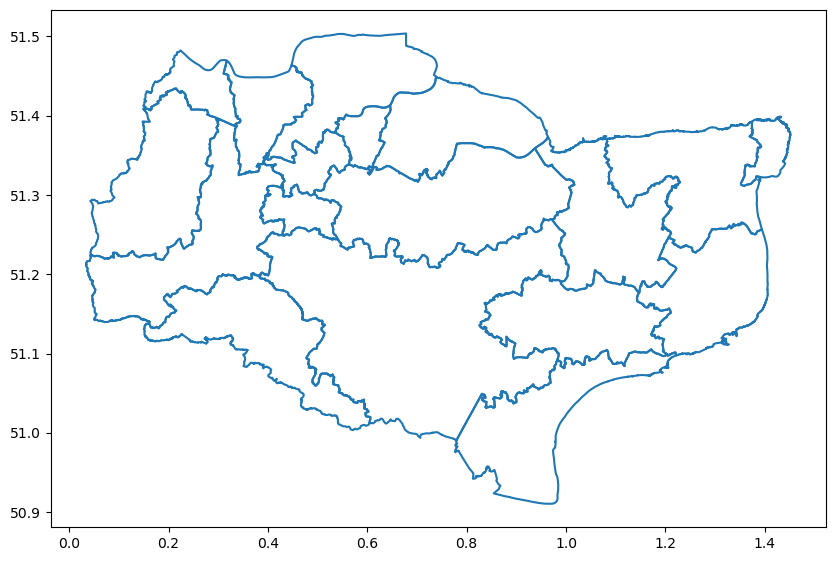

In [45]:
# Boundaries
gdf_boundaries = (
    gpd.read_file('data/boundaries/2023_06_27_Final_recommendations_England.gpkg')
    .loc[lambda _df: _df['Constituen'].isin(consituencies)]
)


fig, ax = plt.subplots(figsize=(10,8))
gdf_boundaries.to_crs(epsg=4326).boundary.plot(ax=ax)

In [ ]:
def plot_df(df, column=None, ax=None):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=3857)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=0.5, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    # cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)

def plot_shape(shape, ax=None):
    df = gpd.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax)

def plot_cells(cells, ax=None):
    shape = h3.cells_to_h3shape(cells)
    plot_shape(shape, ax=ax)

fig, ax = plt.subplots(figsize=(10,10))
gdf_boundaries.to_crs(epsg=3857).boundary.plot(ax=ax, color=None, linewidth=0)
# gdf_cons.to_crs(epsg=3857).boundary.plot(ax=ax, color=None, linewidth=0)
plot_cells(h3.geo_to_cells(gdf_boundaries.iloc[0]['geometry'], res=10), ax=ax)
# plot_cells(h3.geo_to_cells(gdf_cons_clipped.iloc[1]['geometry'], res=10), ax=ax)
# plot_cells(h3.geo_to_cells(gdf_cons_clipped.iloc[2]['geometry'], res=10), ax=ax)

plt.show()
